In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
sns.set()


df = pd.read_csv('../data/ADNIMERGE_04Dec2025.csv')
print(f"Dimensões: {df.shape[0]} linhas x {df.shape[1]} colunas")
df.columns = [x.lower().strip() for x in df.columns]
df.head()

Dimensões: 16421 linhas x 116 colunas


C:\Users\iraci\AppData\Local\Temp\ipykernel_20432\3796449636.py:10: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/ADNIMERGE_04Dec2025.csv')


,rid,colprot,origprot,ptid,site,viscode,examdate,dx_bl,age,ptgender,...,ptau_bl,fdg_bl,pib_bl,av45_bl,fbb_bl,years_bl,month_bl,month,m,update_stamp
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-09-08,CN,74.3,Male,...,NaN,1.33615,NaN,NaN,NaN,0.000000,0.00000,0,0,2023-07-07 04:59:40
1,3,ADNI1,ADNI1,011_S_0003,11,bl,2005-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.000000,0.00000,0,0,2023-07-07 04:59:40
2,3,ADNI1,ADNI1,011_S_0003,11,m06,2006-03-13,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.498289,5.96721,6,6,2023-07-07 04:59:40
3,3,ADNI1,ADNI1,011_S_0003,11,m12,2006-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.999316,11.96720,12,12,2023-07-07 04:59:40
4,3,ADNI1,ADNI1,011_S_0003,11,m24,2007-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,1.998630,23.93440,24,24,2023-07-07 04:59:40


Informações do dataset  e seus dados iniciais


In [2]:
df.info()
print('_______________________________')
print(df.index)
print('_______________________________')
print(df.shape)
print('_______________________________')
print('Colunas:', df.columns.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16421 entries, 0 to 16420
Columns: 116 entries, rid to update_stamp
dtypes: float64(88), int64(5), object(23)
memory usage: 14.5+ MB
_______________________________
RangeIndex(start=0, stop=16421, step=1)
_______________________________
(16421, 116)
_______________________________
Colunas: ['rid' 'colprot' 'origprot' 'ptid' 'site' 'viscode' 'examdate' 'dx_bl'
 'age' 'ptgender' 'pteducat' 'ptethcat' 'ptraccat' 'ptmarry' 'apoe4' 'fdg'
 'pib' 'av45' 'fbb' 'abeta' 'tau' 'ptau' 'cdrsb' 'adas11' 'adas13'
 'adasq4' 'mmse' 'ravlt_immediate' 'ravlt_learning' 'ravlt_forgetting'
 'ravlt_perc_forgetting' 'ldeltotal' 'digitscor' 'trabscor' 'faq' 'moca'
 'ecogptmem' 'ecogptlang' 'ecogptvisspat' 'ecogptplan' 'ecogptorgan'
 'ecogptdivatt' 'ecogpttotal' 'ecogspmem' 'ecogsplang' 'ecogspvisspat'
 'ecogspplan' 'ecogsporgan' 'ecogspdivatt' 'ecogsptotal' 'fldstreng'
 'fsversion' 'imageuid' 'ventricles' 'hippocampus' 'wholebrain'
 'entorhinal' 'fusiform' 'mid

Colunas AdniMerge

In [3]:

print(f"Total de registros: {df['ptid'].count()}")
print(f"Pacientes únicos: {df['ptid'].nunique()}")  
print(f"O total de ids  pacientes {df['ptid'].count()}, desses a quantidade total de pacientes unicos sao {df['ptid'].value_counts().shape[0]} ")

Total de registros: 16421
Pacientes únicos: 2430
O total de ids  pacientes 16421, desses a quantidade total de pacientes unicos sao 2430 


Estatisticas resumidas

In [4]:
df.describe()


,rid,site,age,pteducat,apoe4,fdg,pib,av45,fbb,cdrsb,...,ecogspdivatt_bl,ecogsptotal_bl,fdg_bl,pib_bl,av45_bl,fbb_bl,years_bl,month_bl,month,m
count,16421.000000,16421.000000,16412.000000,16421.000000,16056.000000,3693.000000,223.000000,3080.000000,513.000000,11747.000000,...,8915.000000,9085.000000,11220.000000,154.000000,7836.000000,1099.000000,16421.000000,16421.000000,16421.000000,16421.000000
mean,2899.082273,81.733329,73.214173,16.105779,0.516193,1.175624,1.783161,1.193030,1.175212,2.047927,...,1.735025,1.601863,1.226786,1.582256,1.186525,1.163109,2.738280,32.792027,32.712259,32.580903
std,2220.442824,132.762777,7.028099,2.762672,0.646953,0.167288,0.422511,0.230866,0.246133,2.866563,...,0.861453,0.670951,0.153364,0.302114,0.220110,0.236850,2.939675,35.203809,35.193789,35.124178
min,2.000000,2.000000,50.400000,4.000000,0.000000,0.566989,1.095000,0.809000,0.870200,0.000000,...,1.000000,1.000000,0.621933,1.155000,0.810000,0.870200,0.000000,0.000000,0.000000,0.000000
25%,751.000000,22.000000,68.500000,14.000000,0.000000,1.071700,1.361250,1.010075,0.996900,0.000000,...,1.000000,1.102560,1.134820,1.360000,1.012400,0.995100,0.506502,6.065570,6.000000,6.000000
50%,2308.000000,41.000000,73.200000,16.000000,0.000000,1.180590,1.850000,1.106800,1.054000,1.000000,...,1.500000,1.333330,1.234580,1.490000,1.098400,1.041700,1.960300,23.475400,24.000000,24.000000
75%,4707.000000,123.000000,78.100000,18.000000,1.000000,1.287080,2.127500,1.358425,1.350800,3.000000,...,2.000000,1.897440,1.331470,1.835000,1.346900,1.318600,4.010950,48.032800,48.000000,48.000000
max,7125.000000,941.000000,91.400000,20.000000,2.000000,1.776170,2.927500,2.686600,2.008800,18.000000,...,4.000000,3.948720,1.776170,2.282500,2.010100,1.909000,16.961000,203.115000,204.000000,204.000000


In [5]:
df.describe(include=['O'])

,colprot,origprot,ptid,viscode,examdate,dx_bl,ptgender,ptethcat,ptraccat,ptmarry,...,fldstreng,fsversion,dx,examdate_bl,fldstreng_bl,fsversion_bl,abeta_bl,tau_bl,ptau_bl,update_stamp
count,16421,16421,16421,16421,16421,16410,16421,16421,16421,16420,...,7659,10132,11458,16421,12996,16160,10083,10083,10083,16421
unique,4,4,2430,37,4071,5,2,3,7,5,...,2,3,3,1344,2,3,1292,1409,1409,83
top,ADNI2,ADNI1,126_S_0605,bl,2011-12-05,LMCI,Male,Not Hisp/Latino,White,Married,...,1.5 Tesla MRI,Cross-Sectional FreeSurfer (5.1),MCI,2006-04-25,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,>1700,211.8,18.85,2023-07-07 04:59:48
freq,6945,7267,25,2430,19,5275,8981,15798,15101,12524,...,3923,4262,4989,96,7258,7258,1884,33,34,914


# Data Cleaning and Feature Engineering

In [6]:
visits_per_patient = df.groupby('ptid').size()
print("Estatísticas do número de visitas por paciente:")
print(visits_per_patient.describe())

print(f"\nPacientes com múltiplas visitas: {len(visits_per_patient[visits_per_patient > 1])}")

if 'examdate' in df.columns:
    df_sorted = df.sort_values(by=['ptid', 'examdate'])
    print("\nDataFrame ordenado por paciente e data de exame.")
    print("Primeiras 20 linhas do DataFrame ordenado (para visualizar):")
    print(df_sorted[['ptid', 'examdate']])
    print("\nO DataFrame completo 'df_sorted' está disponível para exploração.")
else:
    print("Coluna 'examdate' não encontrada. Verifique as colunas disponíveis.")

Estatísticas do número de visitas por paciente:
count    2430.000000
mean        6.757613
std         4.740714
min         1.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        25.000000
dtype: float64

Pacientes com múltiplas visitas: 2209

DataFrame ordenado por paciente e data de exame.
Primeiras 20 linhas do DataFrame ordenado (para visualizar):
             ptid    examdate
669    002_S_0295  2006-05-09
670    002_S_0295  2006-11-02
671    002_S_0295  2007-05-25
5828   002_S_0295  2007-11-12
672    002_S_0295  2008-08-04
...           ...         ...
15841  941_S_7051  2022-03-30
16337  941_S_7051  2023-04-04
15917  941_S_7074  2022-05-02
16348  941_S_7074  2023-05-09
16003  941_S_7085  2022-07-11

[16421 rows x 2 columns]

O DataFrame completo 'df_sorted' está disponível para exploração.


In [7]:
df_sorted[['ptid', 'examdate']]

,ptid,examdate
669,002_S_0295,2006-05-09
670,002_S_0295,2006-11-02
671,002_S_0295,2007-05-25
5828,002_S_0295,2007-11-12
672,002_S_0295,2008-08-04
...,...,...
15841,941_S_7051,2022-03-30
16337,941_S_7051,2023-04-04
15917,941_S_7074,2022-05-02
16348,941_S_7074,2023-05-09


Ordenando os dados por pacientes,por genero,  data do exame , dado do resultado do alelo 4 do gene apoe que é um dos principais fatores de risco genético pra doenca de alzeihmer,para comparar os resultados e ver se houve alguma alteracao

In [8]:
df_sorted = df.sort_values(by=['ptid', 'examdate'])
df[['ptid','ptgender', 'apoe4', 'examdate']].sort_values(by=['ptid','ptgender','examdate'])

,ptid,ptgender,apoe4,examdate
669,002_S_0295,Male,1.0,2006-05-09
670,002_S_0295,Male,1.0,2006-11-02
671,002_S_0295,Male,1.0,2007-05-25
5828,002_S_0295,Male,1.0,2007-11-12
672,002_S_0295,Male,1.0,2008-08-04
...,...,...,...,...
15841,941_S_7051,Male,NaN,2022-03-30
16337,941_S_7051,Male,NaN,2023-04-04
15917,941_S_7074,Male,NaN,2022-05-02
16348,941_S_7074,Male,NaN,2023-05-09


In [9]:

df[['ptgender', 'apoe4']].groupby(['ptgender'], as_index=False).mean()

,ptgender,apoe4
0,Female,0.493103
1,Male,0.535203


In [10]:
df_age_abeta = df[['ptid','age', 'abeta','examdate','ptgender']].sort_values(by=['abeta','ptid','ptgender'])
df_age_abeta.head()

,ptid,age,abeta,examdate,ptgender
7406,021_S_4335,71.7,203.0,2011-11-17,Female
259,018_S_0103,87.3,210.9,2006-02-02,Male
6375,073_S_0565,74.6,212.3,2006-08-03,Male
1366,133_S_0638,83.1,212.3,2007-09-05,Male
1317,128_S_0608,68.4,213.1,2007-06-21,Female


In [11]:

print('colunas de diagnosticos:',df['dx_bl'].unique())
media_idade=df['age'].mean()
print(f"A idade média dos pacientes é: {media_idade:.2f} anos.")

colunas de diagnosticos: ['CN' 'AD' 'LMCI' 'SMC' 'EMCI' nan]
A idade média dos pacientes é: 73.21 anos.


In [12]:
df[(df['age'] > 60) & (df['dx_bl'] =='CN')]

,rid,colprot,origprot,ptid,site,viscode,examdate,dx_bl,age,ptgender,...,ptau_bl,fdg_bl,pib_bl,av45_bl,fbb_bl,years_bl,month_bl,month,m,update_stamp
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-09-08,CN,74.3,Male,...,NaN,1.33615,NaN,NaN,NaN,0.000000,0.0000,0,0,2023-07-07 04:59:40
10,5,ADNI1,ADNI1,011_S_0005,11,bl,2005-09-07,CN,73.7,Male,...,33.43,1.25956,NaN,NaN,NaN,0.000000,0.0000,0,0,2023-07-07 04:59:40
11,5,ADNI1,ADNI1,011_S_0005,11,m06,2006-03-09,CN,73.7,Male,...,33.43,1.25956,NaN,NaN,NaN,0.501027,6.0000,6,6,2023-07-07 04:59:40
12,5,ADNI1,ADNI1,011_S_0005,11,m12,2006-09-05,CN,73.7,Male,...,33.43,1.25956,NaN,NaN,NaN,0.993840,11.9016,12,12,2023-07-07 04:59:40
13,5,ADNI1,ADNI1,011_S_0005,11,m24,2007-09-07,CN,73.7,Male,...,33.43,1.25956,NaN,NaN,NaN,1.998630,23.9344,24,24,2023-07-07 04:59:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16399,6950,ADNI3,ADNI3,035_S_6950,35,m24,2023-07-18,CN,74.8,Female,...,NaN,NaN,NaN,0.9960,NaN,1.968510,23.5738,24,24,2023-07-19 04:59:40
16402,934,ADNI3,ADNI1,057_S_0934,57,m198,2023-07-24,CN,70.0,Female,...,NaN,1.23531,NaN,NaN,NaN,16.744700,200.5250,198,198,2023-07-26 05:00:27
16406,6509,ADNI3,ADNI3,135_S_6509,135,m60,2023-08-01,CN,65.4,Male,...,NaN,NaN,NaN,NaN,1.2828,4.985630,59.7049,60,60,2023-08-03 05:00:43
16411,6551,ADNI3,ADNI3,035_S_6551,35,m60,2023-08-10,CN,72.8,Female,...,NaN,NaN,NaN,1.6992,NaN,4.963720,59.4426,60,60,2023-08-11 04:59:52


In [13]:
df['IdadeGrupo'] = pd.cut(df['age'], 4)

df_normais = df[df['dx_bl'] == 'CN']
print(f"Pacientes normais (CN): {df_normais.shape[0]} registros.")
df_normais.groupby('IdadeGrupo', as_index=False, observed=False)['ptid'].nunique().rename(columns={'ptid': 'PacientesUnicos'})


Pacientes normais (CN): 4904 registros.


,IdadeGrupo,PacientesUnicos
0,"(50.359, 60.65]",16
1,"(60.65, 70.9]",179
2,"(70.9, 81.15]",282
3,"(81.15, 91.4]",64


In [14]:
df_Alzeihmer = df[df['dx_bl'] == 'AD']
print(f"Pacientes com Alzheimer (AD): {df_Alzeihmer.shape[0]} registros.")
df_Alzeihmer.groupby('IdadeGrupo', as_index=False, observed=False)['ptid'].nunique().rename(columns={'ptid': 'PacientesUnicos'})

Pacientes com Alzheimer (AD): 1751 registros.


,IdadeGrupo,PacientesUnicos
0,"(50.359, 60.65]",25
1,"(60.65, 70.9]",91
2,"(70.9, 81.15]",204
3,"(81.15, 91.4]",91


Sem pacientes unicos as medias sao

In [15]:
df_Alzeihmer[['IdadeGrupo', 'mmse', 'cdrsb', 'adas13', "adas11"]].groupby('IdadeGrupo', as_index=False, observed=False).mean()


,IdadeGrupo,mmse,cdrsb,adas13,adas11
0,"(50.359, 60.65]",21.101449,5.557143,34.000000,22.904714
1,"(60.65, 70.9]",21.000000,5.638889,33.627290,23.540219
2,"(70.9, 81.15]",21.768608,5.545382,32.320777,21.701515
3,"(81.15, 91.4]",21.741935,6.108541,32.912620,22.270722


In [16]:
df[['dx_bl', 'mmse', 'cdrsb', 'adas13', "adas11"]].groupby('dx_bl', as_index=False).mean()

,dx_bl,mmse,cdrsb,adas13,adas11
0,AD,21.553859,5.692186,32.828403,22.305320
1,CN,28.745310,0.422007,9.927958,6.313117
2,EMCI,27.868762,1.532520,13.179856,8.413933
3,LMCI,25.739754,2.947172,21.252307,13.639609
4,SMC,28.882118,0.249760,9.015509,5.821892


# Statistical Analysis

In [17]:
df[['IdadeGrupo', 'dx_bl']]

,IdadeGrupo,dx_bl
0,"(70.9, 81.15]",CN
1,"(81.15, 91.4]",AD
2,"(81.15, 91.4]",AD
3,"(81.15, 91.4]",AD
4,"(81.15, 91.4]",AD
...,...,...
16416,"(70.9, 81.15]",CN
16417,"(60.65, 70.9]",SMC
16418,"(60.65, 70.9]",SMC
16419,"(81.15, 91.4]",SMC


In [18]:
from sklearn.preprocessing import LabelEncoder

categorize_age = LabelEncoder()
df['AGE_cat'] = categorize_age.fit_transform(df['IdadeGrupo'])
df[['ptid', 'age', 'IdadeGrupo', 'AGE_cat']]

,ptid,age,IdadeGrupo,AGE_cat
0,011_S_0002,74.3,"(70.9, 81.15]",2
1,011_S_0003,81.3,"(81.15, 91.4]",3
2,011_S_0003,81.3,"(81.15, 91.4]",3
3,011_S_0003,81.3,"(81.15, 91.4]",3
4,011_S_0003,81.3,"(81.15, 91.4]",3
...,...,...,...,...
16416,018_S_4349,71.4,"(70.9, 81.15]",2
16417,041_S_6801,61.0,"(60.65, 70.9]",1
16418,041_S_5097,67.5,"(60.65, 70.9]",1
16419,007_S_6515,89.9,"(81.15, 91.4]",3


In [19]:
type(df['AGE_cat'])
df.head()

,rid,colprot,origprot,ptid,site,viscode,examdate,dx_bl,age,ptgender,...,pib_bl,av45_bl,fbb_bl,years_bl,month_bl,month,m,update_stamp,IdadeGrupo,AGE_cat
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-09-08,CN,74.3,Male,...,NaN,NaN,NaN,0.000000,0.00000,0,0,2023-07-07 04:59:40,"(70.9, 81.15]",2
1,3,ADNI1,ADNI1,011_S_0003,11,bl,2005-09-12,AD,81.3,Male,...,NaN,NaN,NaN,0.000000,0.00000,0,0,2023-07-07 04:59:40,"(81.15, 91.4]",3
2,3,ADNI1,ADNI1,011_S_0003,11,m06,2006-03-13,AD,81.3,Male,...,NaN,NaN,NaN,0.498289,5.96721,6,6,2023-07-07 04:59:40,"(81.15, 91.4]",3
3,3,ADNI1,ADNI1,011_S_0003,11,m12,2006-09-12,AD,81.3,Male,...,NaN,NaN,NaN,0.999316,11.96720,12,12,2023-07-07 04:59:40,"(81.15, 91.4]",3
4,3,ADNI1,ADNI1,011_S_0003,11,m24,2007-09-12,AD,81.3,Male,...,NaN,NaN,NaN,1.998630,23.93440,24,24,2023-07-07 04:59:40,"(81.15, 91.4]",3


In [20]:
dataframegrupo= df.groupby('viscode').count().sort_values(by='dx_bl', ascending=False).loc[['bl', 'm03','m06', 'm12', 'm18', 'm24', 'm30','m36'], 'rid']


In [21]:
dataframe2 = pd.DataFrame(df.groupby(['viscode', 'dx']).count().loc[df.groupby(['viscode', 'dx']).count().index.get_level_values('viscode').isin(existing_viscodes), 'rid'])
dataframe2.columns = ['Participantes']
dataframe2.unstack(level=1)

NameError: name 'existing_viscodes' is not defined

In [ ]:
dataframe3 = pd.DataFrame(df.groupby(['viscode', 'dx_bl']).count().loc[df.groupby(['viscode', 'dx_bl']).count().index.get_level_values('viscode').isin(existing_viscodes), 'rid'])
dataframe3.columns = ['Participantes']
dataframe3.unstack(level=1)

Participantes                    
dx_bl              AD   CN EMCI LMCI  SMC
viscode                                  
bl                411  542  423  690  353
m06               307  400  275  542   94
m12               322  490  350  592  216
m18               229  380  232  470    9
m24               208  423  291  484  190
m30                48  263  156  320   28
m36                37  275  249  401  108

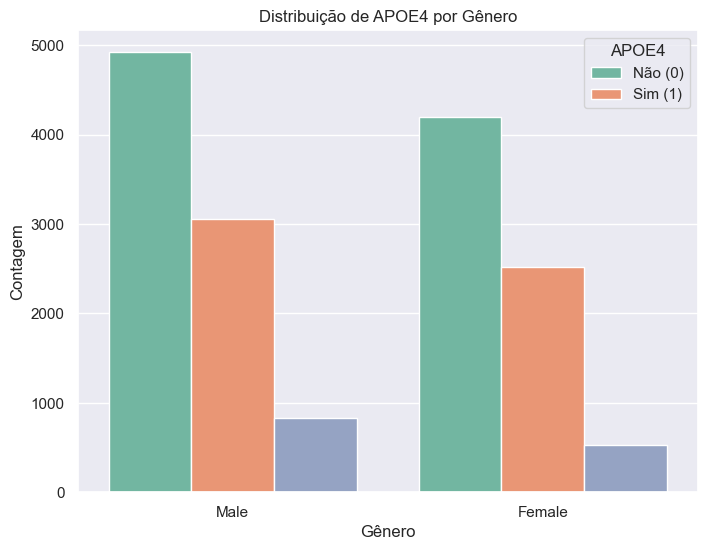

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='ptgender', hue='apoe4', palette='Set2')
plt.title('Distribuição de APOE4 por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.legend(title='APOE4', labels=['Não (0)', 'Sim (1)'])
plt.show()

# Visualizations

Valores únicos em 'dx_bl' (diagnóstico basal):
['CN' 'AD' 'LMCI' 'SMC' 'EMCI' nan]

Contagem de diagnósticos:
dx_bl
LMCI    5275
CN      4904
EMCI    2995
AD      1751
SMC     1485
Name: count, dtype: int64


C:\Users\iraci\AppData\Local\Temp\ipykernel_7300\385749027.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='dx_bl', order=df['dx_bl'].value_counts().index, palette='viridis')


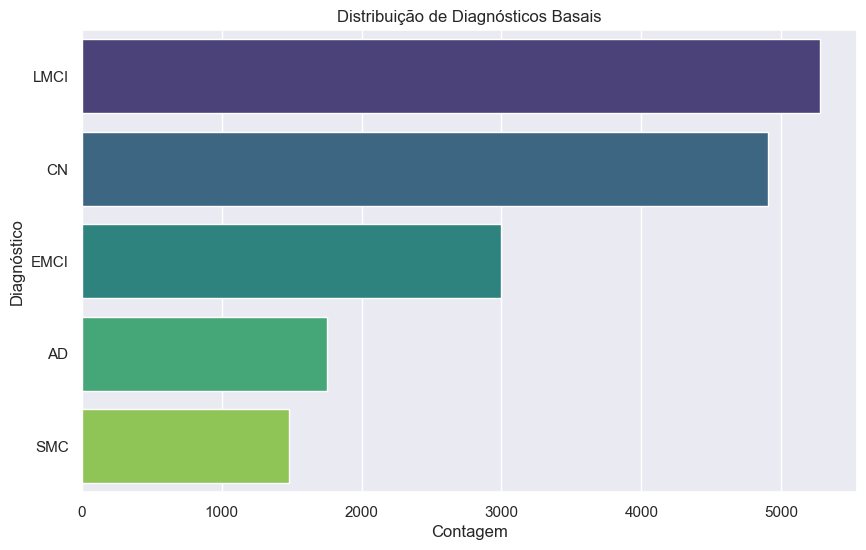

In [ ]:
if 'dx_bl' in df.columns:
    print("Valores únicos em 'dx_bl' (diagnóstico basal):")
    print(df['dx_bl'].unique())
    print("\nContagem de diagnósticos:")
    print(df['dx_bl'].value_counts())
    
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y='dx_bl', order=df['dx_bl'].value_counts().index, palette='viridis')
    plt.title('Distribuição de Diagnósticos Basais')
    plt.xlabel('Contagem')
    plt.ylabel('Diagnóstico')
    plt.show()
else:
    print("Coluna 'dx_bl' não encontrada. Verifique as colunas disponíveis.")

In [ ]:


if 'dx' in df.columns:
    patients_with_cn = set(df[df['dx'] == 'CN']['ptid'].unique())
    patients_with_ad_or_mci = set(df[df['dx'].isin(['Dementia', 'MCI'])]['ptid'].unique())
    patients_progressed = patients_with_cn & patients_with_ad_or_mci
    
    print(f"Pacientes que têm registros CN e Dementia/MCI: {len(patients_progressed)}")
    
    if patients_progressed:
        example_patient = list(patients_progressed)[0]
        patient_data = df[df['ptid'] == example_patient].sort_values('examdate')[['examdate', 'dx_bl', 'dx']]
        print(f"\nExemplo de progressão para paciente {example_patient}:")
        print(patient_data)
    else:
        print("Nenhum paciente encontrado com progressão de CN para Dementia ou MCI.")
else:
    print("erro")

Pacientes que têm registros CN e Dementia/MCI: 244

Exemplo de progressão para paciente 067_S_0059:
         examdate dx_bl   dx
122    2005-12-22    CN   CN
123    2006-07-07    CN   CN
124    2006-12-12    CN   CN
5239   2007-06-27    CN  NaN
5240   2008-06-09    CN  NaN
125    2008-12-09    CN   CN
5241   2009-06-12    CN  NaN
5242   2010-05-07    CN   CN
126    2010-12-10    CN   CN
5243   2011-06-21    CN  NaN
11102  2011-12-16    CN   CN
11101  2012-06-28    CN  NaN
11100  2012-12-07    CN  MCI
11099  2013-07-02    CN  NaN
11098  2013-12-13    CN   CN
11097  2014-12-15    CN   CN
11096  2016-01-20    CN   CN
13918  2017-12-12    CN  MCI
12978  2018-12-17    CN  NaN
13919  2019-12-20    CN  MCI
13342  2021-06-30    CN  NaN


In [ ]:
print("Valores únicos em 'dx':")
print(df['dx'].unique())


cn_patients = df[df['dx_bl'] == 'CN']['ptid'].unique()
changes_to_dementia = df[(df['ptid'].isin(cn_patients)) & (df['dx'] == 'Dementia') & (df['dx'].notna())]
if not changes_to_dementia.empty:
    num_progressed_to_ad = changes_to_dementia['ptid'].nunique()
    print(f"Pacientes CN no baseline que progrediram para Dementia: {num_progressed_to_ad}")
    
    example_patient = changes_to_dementia['ptid'].iloc[0]
    patient_data = df[df['ptid'] == example_patient].sort_values('examdate')[['examdate', 'dx_bl', 'dx']]
    print(f"\nExemplo de progressão para paciente {example_patient}:")
    print(patient_data.head(20))  
else:
    print("Nenhum paciente CN no baseline progrediu para Dementia.")

Valores únicos em 'dx':
['CN' 'Dementia' 'MCI' nan]
Pacientes CN no baseline que progrediram para Dementia: 33

Exemplo de progressão para paciente 005_S_0223:
        examdate dx_bl        dx
521   2006-03-24    CN        CN
522   2006-09-13    CN       MCI
523   2007-03-26    CN       MCI
5667  2007-10-01    CN       NaN
524   2008-03-18    CN       MCI
5668  2008-09-22    CN       NaN
525   2009-03-17    CN  Dementia


In [ ]:
mci_patients = df[df['dx_bl'].isin(['EMCI', 'LMCI'])]['ptid'].unique()
mci_to_dementia_m48 = df[(df['ptid'].isin(mci_patients)) & (df['dx'] == 'Dementia') & (df['viscode'] == 'm48')]

if not mci_to_dementia_m48.empty:
    num_mci_to_ad_m48 = mci_to_dementia_m48['ptid'].nunique()
    print(f"Pacientes MCI no baseline que progrediram para Dementia na 48º visita: {num_mci_to_ad_m48}")

    print(mci_to_dementia_m48.head())
else:
    print("Nenhum paciente MCI no baseline progrediu para Dementia na 48º visita.")

Pacientes MCI no baseline que progrediram para Dementia na 48º visita: 142
     rid colprot origprot        ptid  site viscode    examdate dx_bl   age  \
75    42   ADNI1    ADNI1  023_S_0042    23     m48  2010-03-18  LMCI  72.8   
255  101   ADNI1    ADNI1  007_S_0101     7     m48  2010-01-28  LMCI  73.6   
333  126   ADNI1    ADNI1  023_S_0126    23     m48  2010-03-04  LMCI  77.5   
341  128   ADNI1    ADNI1  007_S_0128     7     m48  2010-02-24  LMCI  64.1   
362  141   ADNI1    ADNI1  021_S_0141    21     m48  2010-02-22  LMCI  81.1   

    ptgender  ...  pib_bl av45_bl fbb_bl years_bl  month_bl  month   m  \
75      Male  ...     NaN     NaN    NaN  4.35044   52.0984     54  48   
255     Male  ...     NaN     NaN    NaN  4.06571   48.6885     48  48   
333   Female  ...     NaN     NaN    NaN  4.04381   48.4262     48  48   
341   Female  ...     NaN     NaN    NaN  4.04928   48.4918     48  48   
362     Male  ...     NaN     NaN    NaN  4.00000   47.9016     48  48   

     

In [ ]:
df['viscode'].value_counts()


viscode
bl      2430
m12     1970
m06     1618
m24     1596
m18     1320
m36     1070
m48      846
m30      815
m03      793
m60      466
m72      389
m42      357
m78      341
m66      328
m84      327
m96      267
m54      266
m90      250
m108     218
m120     148
m102     102
m132      89
m114      70
m126      65
m144      52
m138      39
m156      31
m168      29
m180      27
m150      25
m162      23
m186      16
m174      13
m192      13
m198       8
m204       3
m0         1
Name: count, dtype: int64

In [ ]:
df[df['viscode'] == 'bl']['dx'].value_counts()

dx
MCI         1101
CN           895
Dementia     413
Name: count, dtype: int64

In [ ]:
bl_counts = df[df['viscode'] == 'bl'].groupby('dx')['rid'].count()
print("Contagem em bl:")
print(bl_counts)
print()

m06_counts = df[df['viscode'] == 'm06'].groupby('dx')['rid'].count()
print("Contagem em m06:")
print(m06_counts)
print()

m12_counts = df[df['viscode'] == 'm12'].groupby('dx')['rid'].count()
print("Contagem em m12:")
print(m12_counts)
print()

m18_counts = df[df['viscode'] == 'm18'].groupby('dx')['rid'].count()
print("Contagem em m18:")
print(m18_counts)
print()

m24_counts = df[df['viscode'] == 'm24'].groupby('dx')['rid'].count()
print("Contagem em m24:")
print(m24_counts)
m24_counts = df[df['viscode'] == 'm24'].groupby('dx')['rid'].count()
print("Contagem em m24:")
print(m24_counts)
print()

m36_counts = df[df['viscode'] == 'm36'].groupby('dx')['rid'].count()
print("Contagem em m36:")
print(m36_counts)
m48_counts = df[df['viscode'] == 'm48'].groupby('dx')['rid'].count()
print("Contagem em m48:")
print(m48_counts)

Contagem em bl:
dx
CN           895
Dementia     413
MCI         1101
Name: rid, dtype: int64

Contagem em m06:
dx
CN          491
Dementia    355
MCI         770
Name: rid, dtype: int64

Contagem em m12:
dx
CN          494
Dementia    421
MCI         807
Name: rid, dtype: int64

Contagem em m18:
dx
CN           14
Dementia     97
MCI         231
Name: rid, dtype: int64

Contagem em m24:
dx
CN          579
Dementia    384
MCI         553
Name: rid, dtype: int64
Contagem em m24:
dx
CN          579
Dementia    384
MCI         553
Name: rid, dtype: int64

Contagem em m36:
dx
CN          251
Dementia    209
MCI         424
Name: rid, dtype: int64
Contagem em m48:
dx
CN          358
Dementia    147
MCI         287
Name: rid, dtype: int64


In [ ]:
objects = [bl_counts, m06_counts, m12_counts, m18_counts, m24_counts, m36_counts, m48_counts]
overview_DX = pd.concat(objects, axis=1)
overview_DX.columns = ['bl', 'm06', 'm12', 'm18', 'm24', 'm36', 'm48']
overview_DX

,bl,m06,m12,m18,m24,m36,m48
dx,,,,,,,
CN,895,491,494,14,579,251,358
Dementia,413,355,421,97,384,209,147
MCI,1101,770,807,231,553,424,287


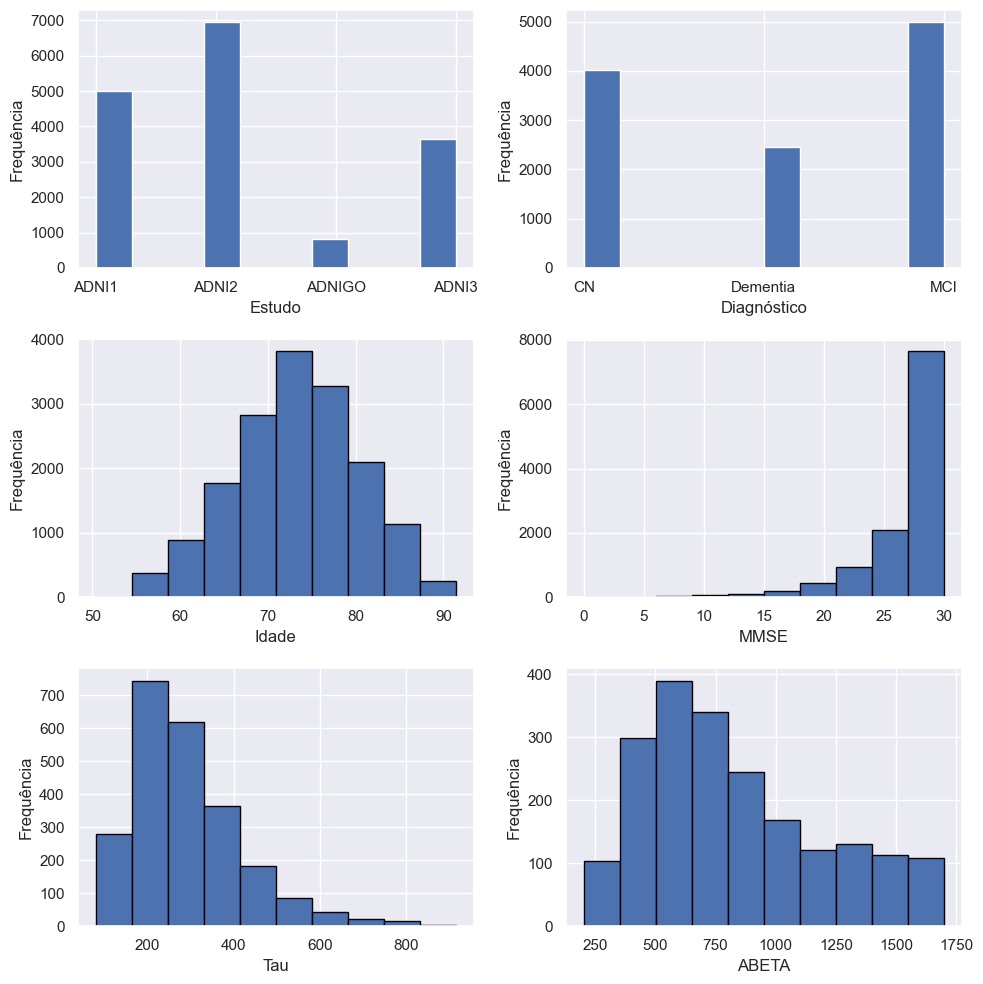

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

axs[0, 0].hist(df['colprot'].dropna())
axs[0, 0].set_xlabel('Estudo')
axs[0, 0].set_ylabel('Frequência')

axs[0, 1].hist(df['dx'].dropna())
axs[0, 1].set_xlabel('Diagnóstico')
axs[0, 1].set_ylabel('Frequência')

axs[1, 0].hist(df['age'], ec='black')
axs[1, 0].set_xlabel('Idade')
axs[1, 0].set_ylabel('Frequência')

axs[2, 1].hist(pd.to_numeric(df['abeta'], errors='coerce').dropna(), ec='black')
axs[2, 1].set_xlabel('ABETA')
axs[2, 1].set_ylabel('Frequência')

axs[2, 0].hist(pd.to_numeric(df['tau'], errors='coerce').dropna(), ec='black')
axs[2, 0].set_xlabel('Tau')
axs[2, 0].set_ylabel('Frequência')

axs[1, 1].hist(pd.to_numeric(df['mmse'], errors='coerce').dropna(), ec='black')
axs[1, 1].set_xlabel('MMSE')
axs[1, 1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()


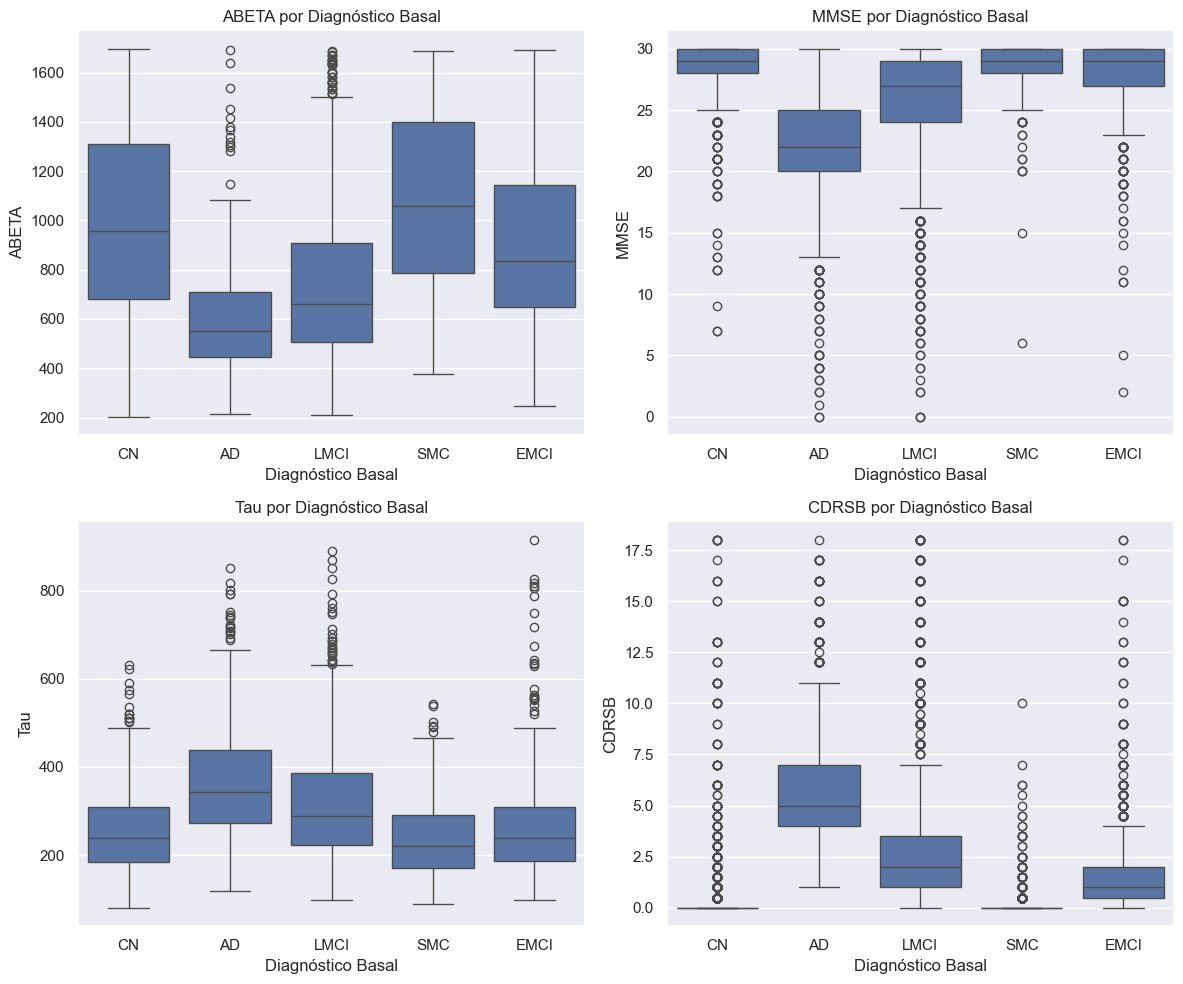

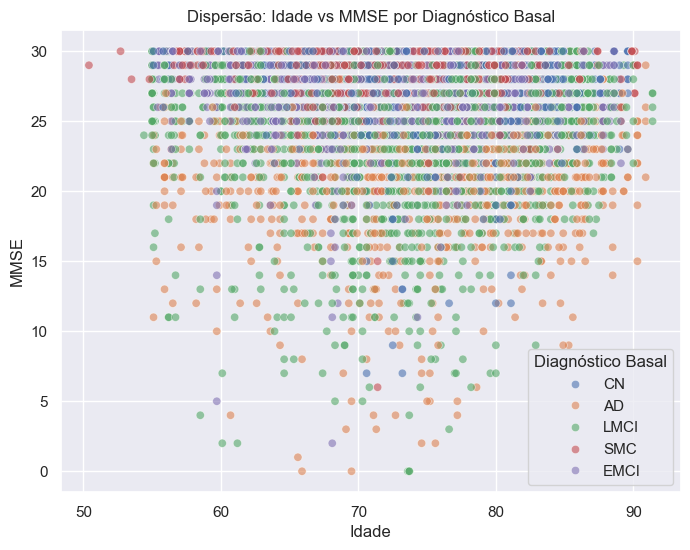

In [ ]:
df_temp = df.copy()
df_temp['abeta_num'] = pd.to_numeric(df_temp['abeta'], errors='coerce')
df_temp['mmse_num'] = pd.to_numeric(df_temp['mmse'], errors='coerce')
df_temp['tau_num'] = pd.to_numeric(df_temp['tau'], errors='coerce')
df_temp['cdrsb_num'] = pd.to_numeric(df_temp['cdrsb'], errors='coerce')

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(x="dx_bl", y="abeta_num", data=df_temp, ax=axs[0,0])
axs[0,0].set_title('ABETA por Diagnóstico Basal')
axs[0,0].set_xlabel('Diagnóstico Basal')
axs[0,0].set_ylabel('ABETA')

sns.boxplot(x="dx_bl", y="mmse_num", data=df_temp, ax=axs[0,1])
axs[0,1].set_title('MMSE por Diagnóstico Basal')
axs[0,1].set_xlabel('Diagnóstico Basal')
axs[0,1].set_ylabel('MMSE')

sns.boxplot(x="dx_bl", y="tau_num", data=df_temp, ax=axs[1,0])
axs[1,0].set_title('Tau por Diagnóstico Basal')
axs[1,0].set_xlabel('Diagnóstico Basal')
axs[1,0].set_ylabel('Tau')

sns.boxplot(x="dx_bl", y="cdrsb_num", data=df_temp, ax=axs[1,1])
axs[1,1].set_title('CDRSB por Diagnóstico Basal')
axs[1,1].set_xlabel('Diagnóstico Basal')
axs[1,1].set_ylabel('CDRSB')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x="age", y="mmse_num", hue="dx_bl", data=df_temp, alpha=0.6)
plt.title('Dispersão: Idade vs MMSE por Diagnóstico Basal')
plt.xlabel('Idade')
plt.ylabel('MMSE')
plt.legend(title='Diagnóstico Basal')
plt.show()

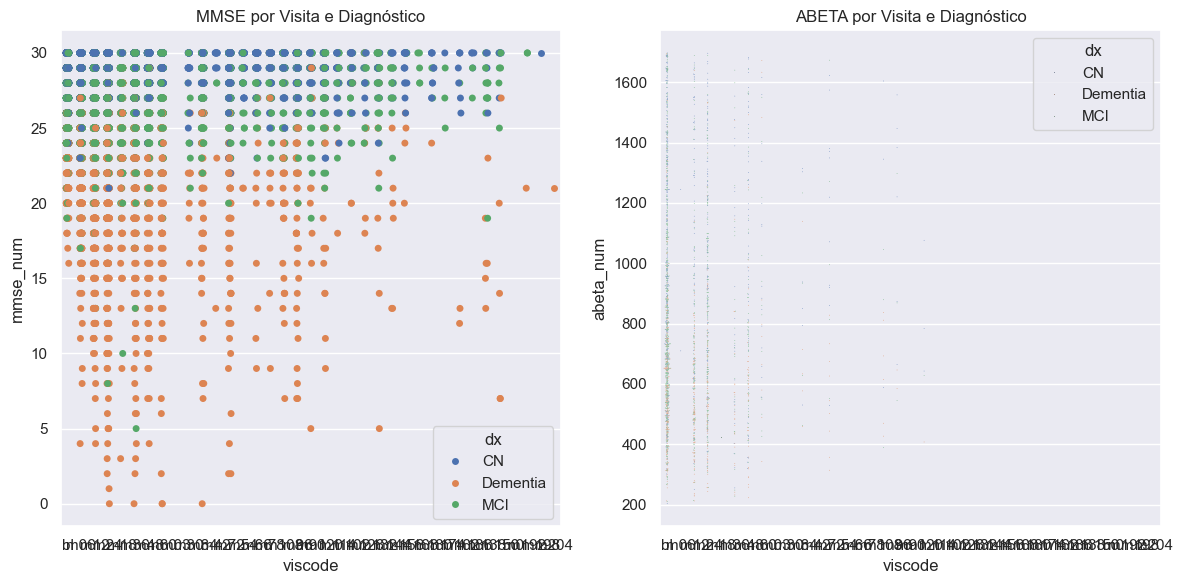

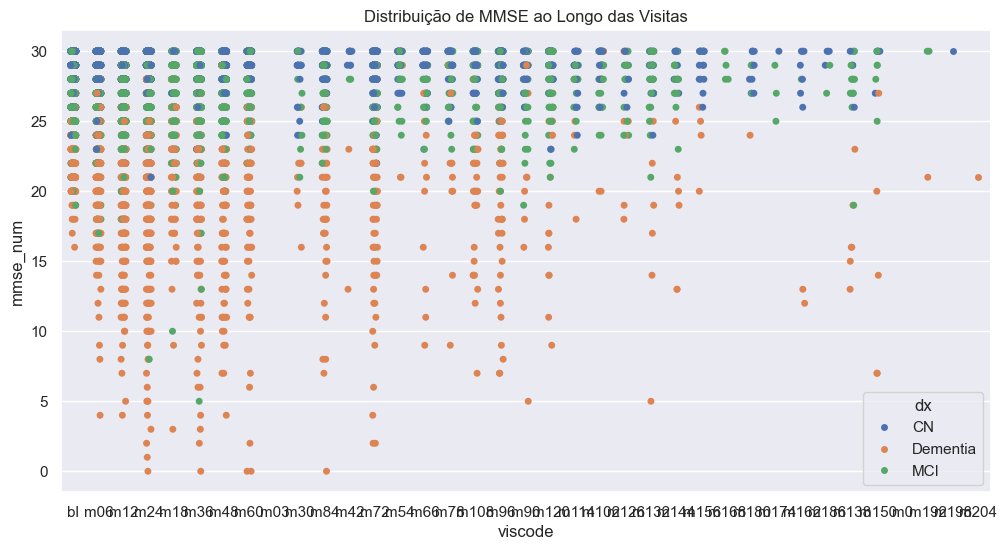

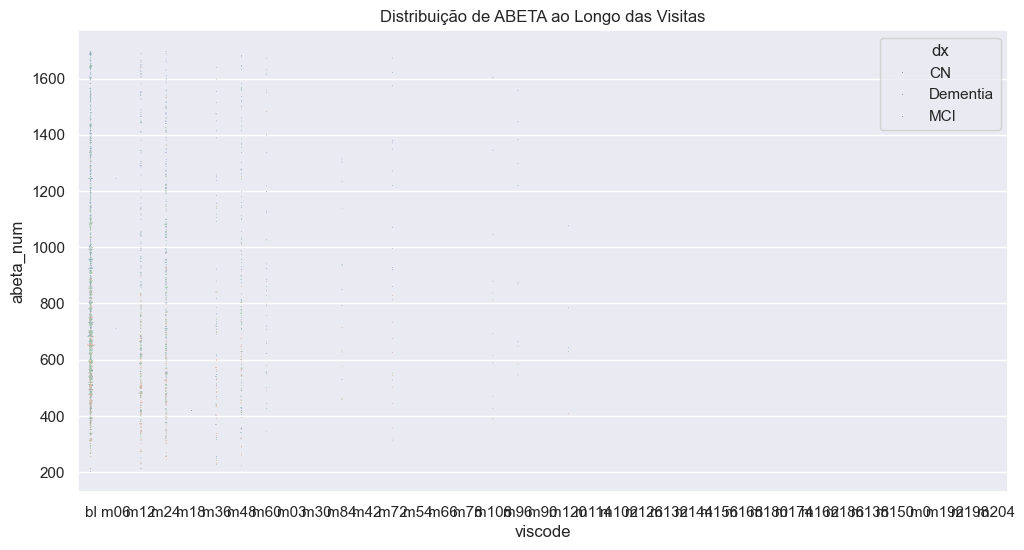

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.stripplot(x="viscode", y="mmse_num", hue="dx", data=df_temp, ax=axs[0])
axs[0].set_title('MMSE por Visita e Diagnóstico')

sns.swarmplot(x="viscode", y="abeta_num", hue="dx", data=df_temp, ax=axs[1], size=0.5)
axs[1].set_title('ABETA por Visita e Diagnóstico')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.stripplot(x="viscode", y="mmse_num", hue="dx", data=df_temp)
plt.title('Distribuição de MMSE ao Longo das Visitas')
plt.show()

plt.figure(figsize=(12,6))
sns.swarmplot(x="viscode", y="abeta_num", hue="dx", data=df_temp, size=0.5)
plt.title('Distribuição de ABETA ao Longo das Visitas')
plt.show()

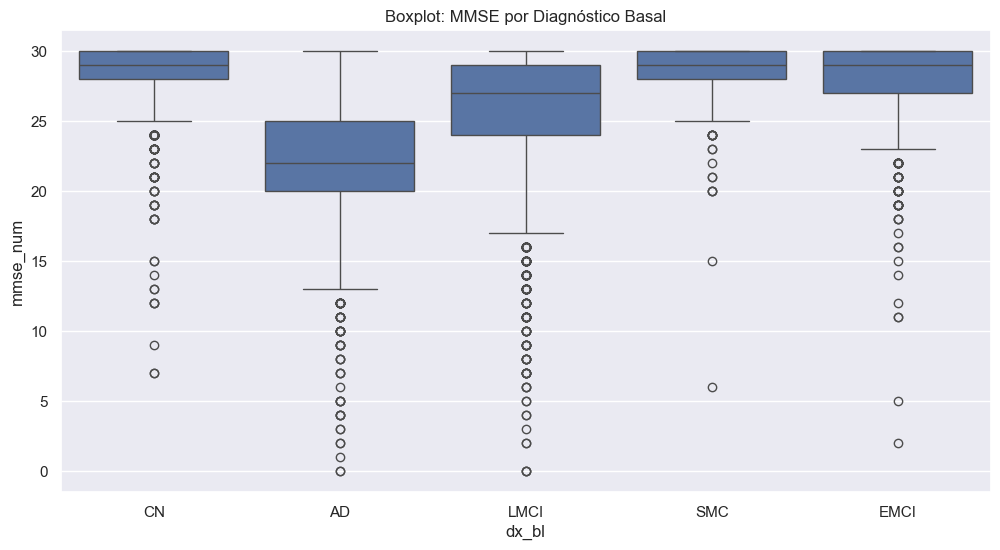

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="dx_bl", y="mmse_num", data=df_temp)
plt.title('Boxplot: MMSE por Diagnóstico Basal')
plt.show()

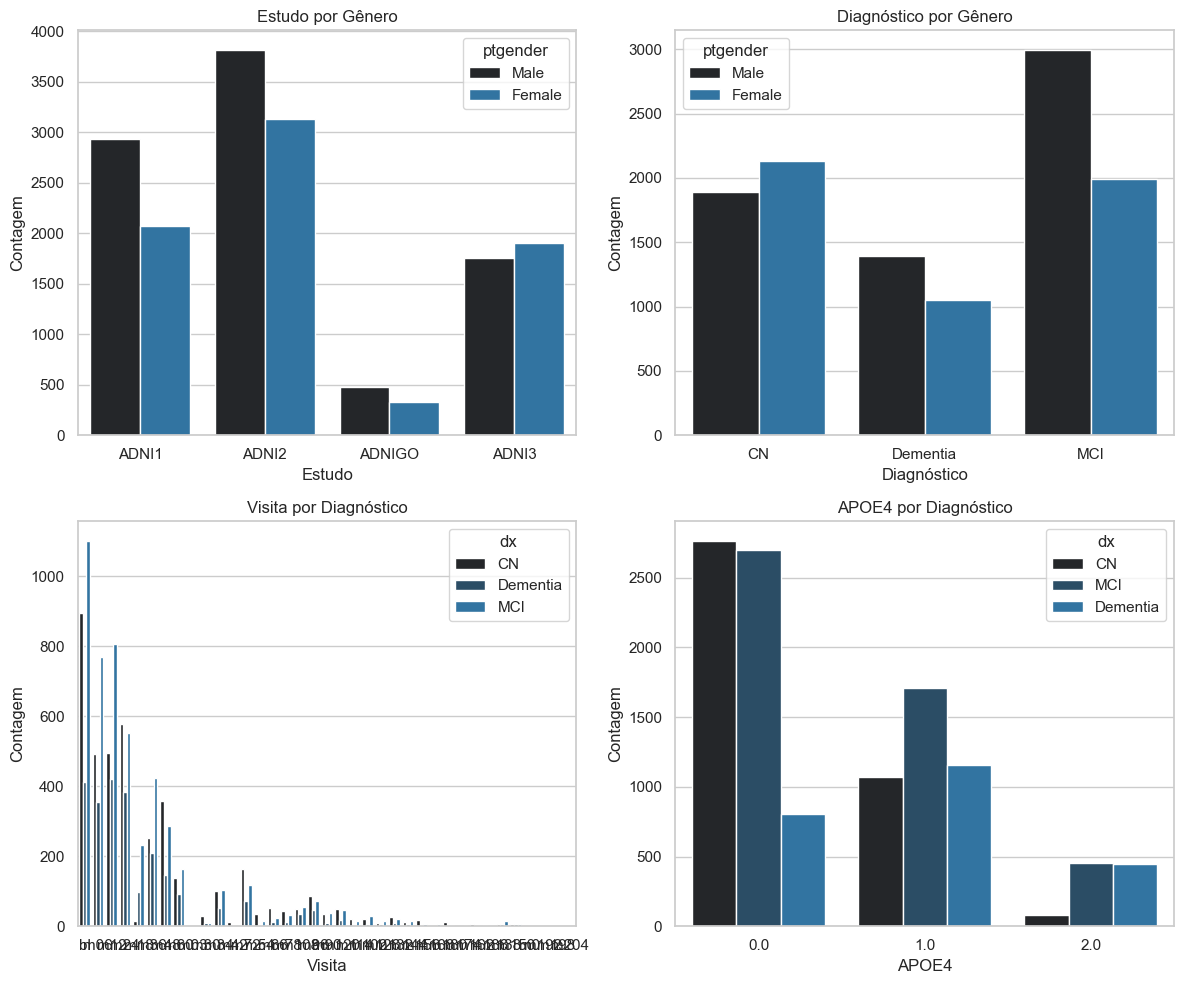

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.set_style('whitegrid')
sns.set_color_codes("muted")

sns.countplot(x='colprot', hue='ptgender', data=df, palette='dark:#1f77b4', ax=axs[0,0])
axs[0,0].set_title('Estudo por Gênero')
axs[0,0].set_xlabel('Estudo')
axs[0,0].set_ylabel('Contagem')

sns.countplot(x='viscode', hue='dx', data=df, palette='dark:#1f77b4', ax=axs[1,0])
axs[1,0].set_title('Visita por Diagnóstico')
axs[1,0].set_xlabel('Visita')
axs[1,0].set_ylabel('Contagem')

sns.countplot(x='dx', hue='ptgender', data=df, palette='dark:#1f77b4', ax=axs[0,1])
axs[0,1].set_title('Diagnóstico por Gênero')
axs[0,1].set_xlabel('Diagnóstico')
axs[0,1].set_ylabel('Contagem')

sns.countplot(x='apoe4', hue='dx', data=df, palette='dark:#1f77b4', ax=axs[1,1])
axs[1,1].set_title('APOE4 por Diagnóstico')
axs[1,1].set_xlabel('APOE4')
axs[1,1].set_ylabel('Contagem')

plt.tight_layout()
plt.show()

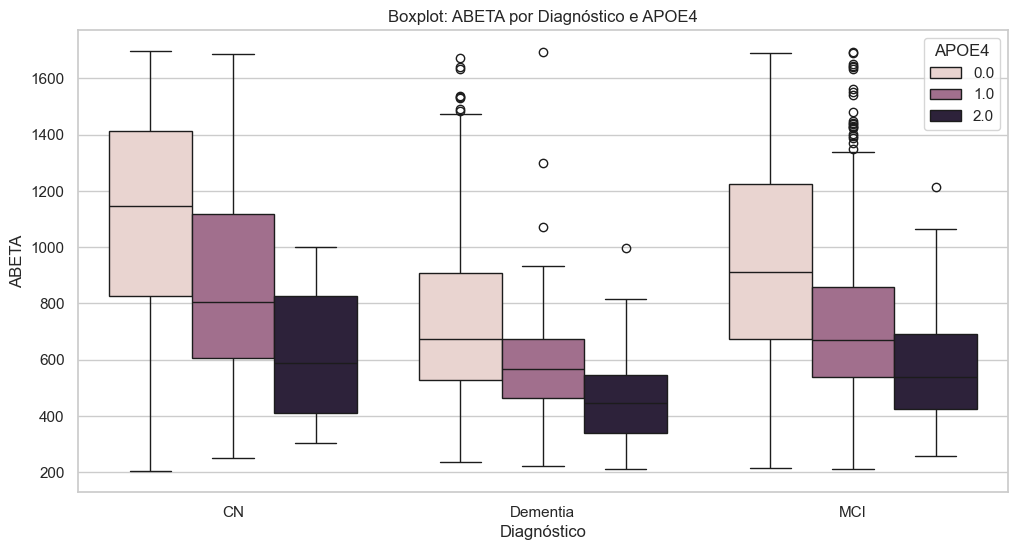

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="dx", y="abeta_num", hue='apoe4', data=df_temp)
plt.title('Boxplot: ABETA por Diagnóstico e APOE4')
plt.xlabel('Diagnóstico')
plt.ylabel('ABETA')
plt.legend(title='APOE4')
plt.show()

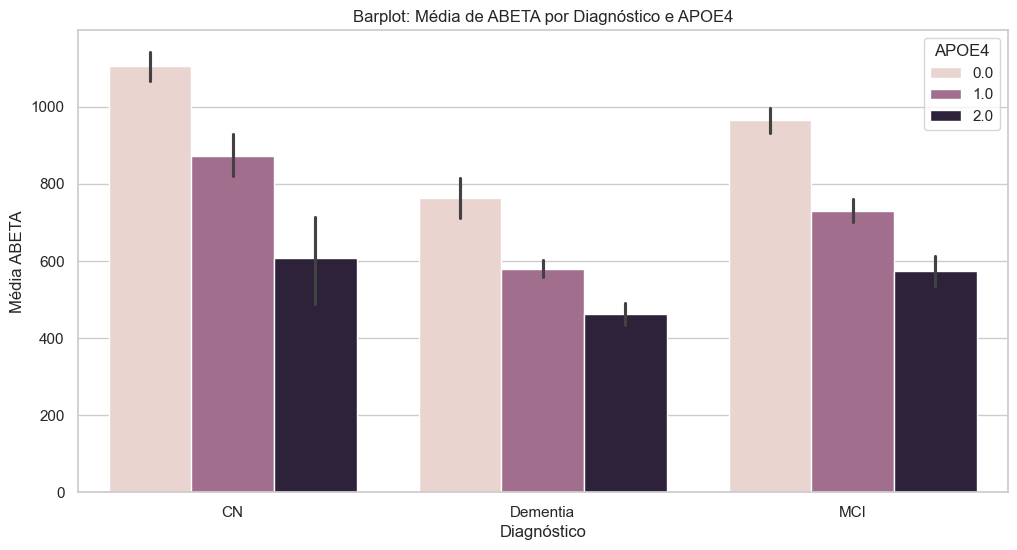

In [ ]:

plt.figure(figsize=(12,6))
sns.barplot(x="dx", y="abeta_num", hue='apoe4', data=df_temp)
plt.title('Barplot: Média de ABETA por Diagnóstico e APOE4')
plt.xlabel('Diagnóstico')
plt.ylabel('Média ABETA')
plt.legend(title='APOE4')
plt.show()

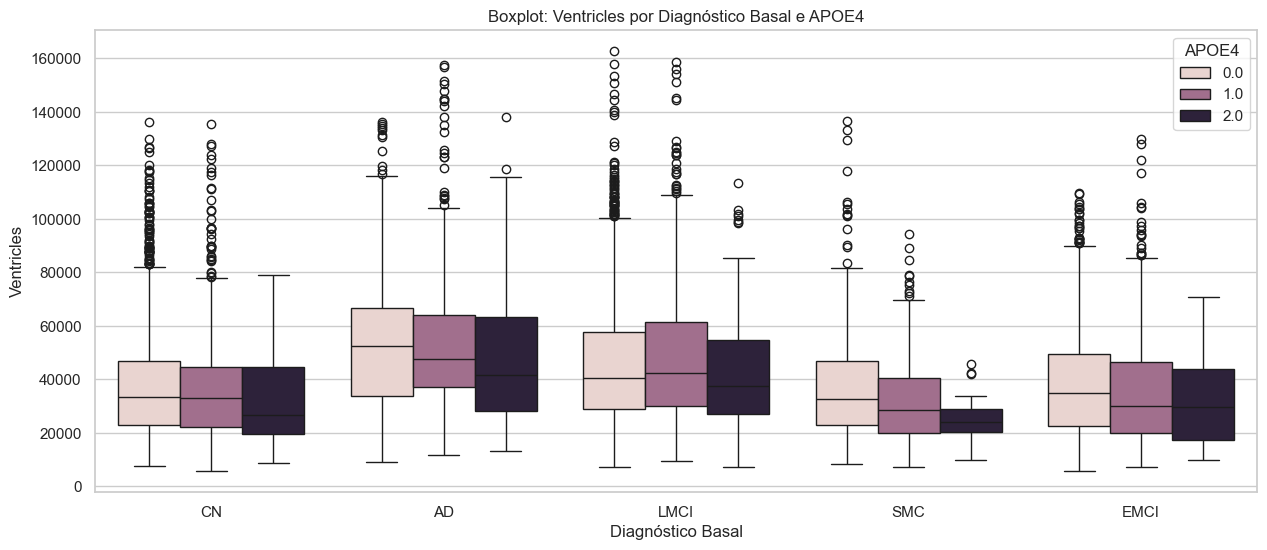

In [ ]:

if 'ventricles' in df.columns:
    df_temp['ventricles_num'] = pd.to_numeric(df_temp['ventricles'], errors='coerce')
    plt.figure(figsize=(15,6))
    sns.boxplot(x="dx_bl", y="ventricles_num", hue='apoe4', data=df_temp)
    plt.title('Boxplot: Ventricles por Diagnóstico Basal e APOE4')
    plt.xlabel('Diagnóstico Basal')
    plt.ylabel('Ventricles')
    plt.legend(title='APOE4')
    plt.show()
else:
    print("Coluna 'ventricles' não encontrada no dataset.")

In [ ]:
df_temp['adas13_num'] = pd.to_numeric(df_temp['adas13'], errors='coerce')
df_temp['adas11_num'] = pd.to_numeric(df_temp['adas11'], errors='coerce')

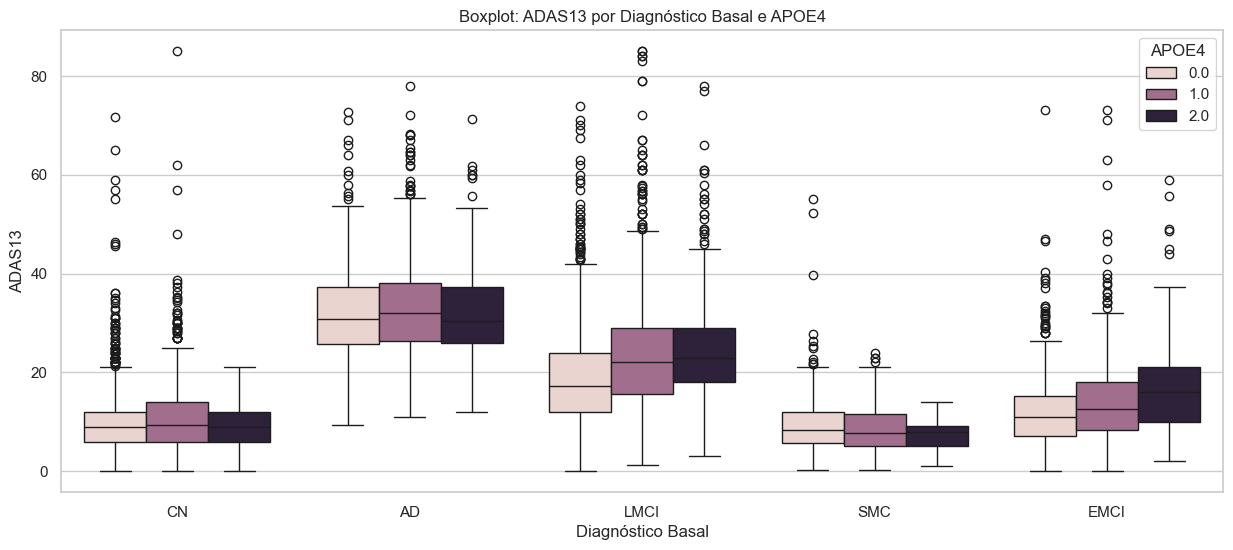

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x="dx_bl", y="adas13_num", hue='apoe4', data=df_temp)
plt.title('Boxplot: ADAS13 por Diagnóstico Basal e APOE4')
plt.xlabel('Diagnóstico Basal')
plt.ylabel('ADAS13')
plt.legend(title='APOE4')
plt.show()

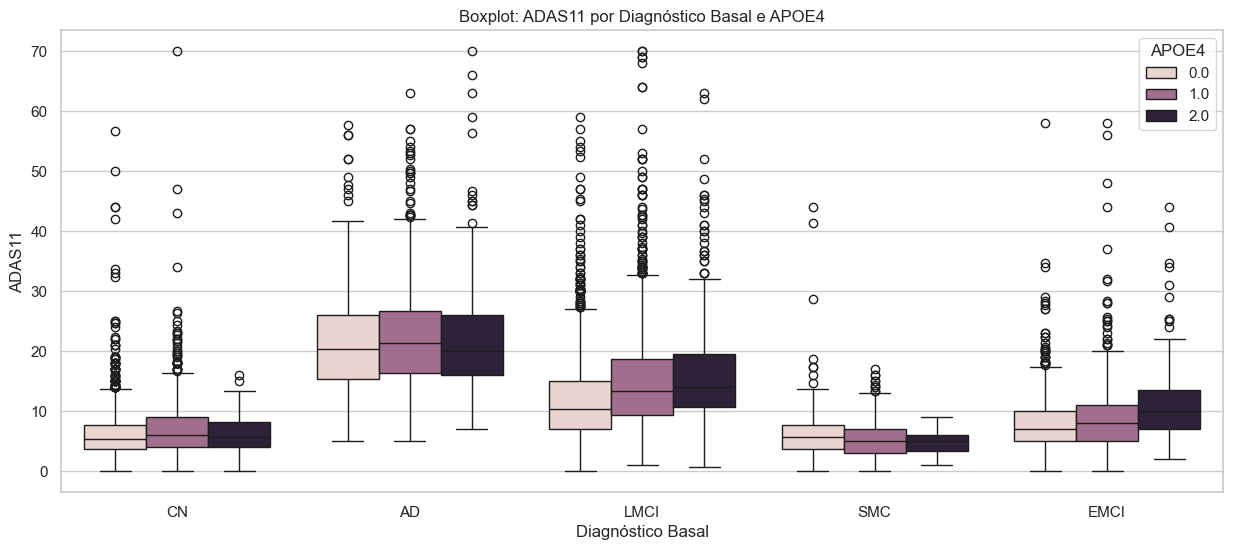

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x="dx_bl", y="adas11_num", hue='apoe4', data=df_temp)
plt.title('Boxplot: ADAS11 por Diagnóstico Basal e APOE4')
plt.xlabel('Diagnóstico Basal')
plt.ylabel('ADAS11')
plt.legend(title='APOE4')
plt.show()

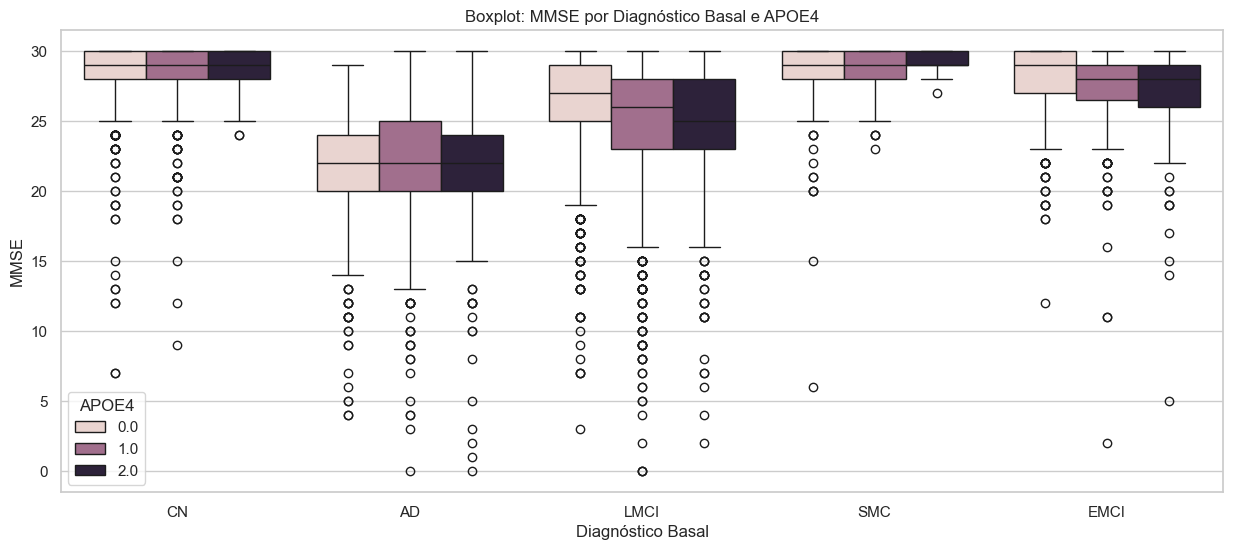

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x="dx_bl", y="mmse_num", hue='apoe4', data=df_temp)
plt.title('Boxplot: MMSE por Diagnóstico Basal e APOE4')
plt.xlabel('Diagnóstico Basal')
plt.ylabel('MMSE')
plt.legend(title='APOE4')
plt.show()

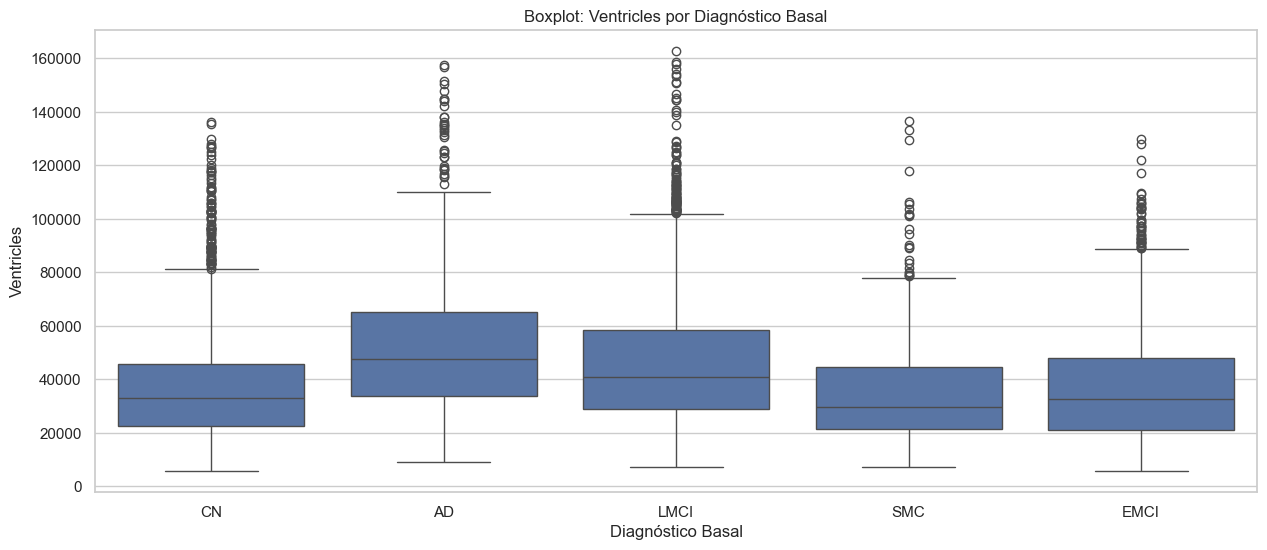

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x="dx_bl", y="ventricles_num", data=df_temp)
plt.title('Boxplot: Ventricles por Diagnóstico Basal')
plt.xlabel('Diagnóstico Basal')
plt.ylabel('Ventricles')
plt.show()

In [ ]:

def count_converters():
    converters = 0
    for idx, row in df.iterrows():
        if row['dx_bl'] == 'EMCI' and row['dx'] == 'Dementia' and row['viscode'] == 'm36':
            converters += 1
    return converters

num_converters = count_converters()
print(f"Número de pacientes que converteram de EMCI para Dementia em m36: {num_converters}")

Número de pacientes que converteram de EMCI para Dementia em m36: 23
